## Second Level GLM: Heat 1, all sub

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from pathlib import Path
import pandas as pd

z_maps = Path('/Volumes/Seagate_Desktop_Drive/mfc/GLM/First_Levels/').glob('*h1*.nii.gz')
z_maps = [str(file) for file in sorted(z_maps)]

In [3]:
# Second Level GLM #1: - heat 1 across all subjects, contrast 1>0 (49>35)

# define design matrix
dm2 = pd.DataFrame([1] * len(z_maps), columns=['intercept'])

# specify & estimate model
from nilearn.glm.second_level import SecondLevelModel
second_level_model = SecondLevelModel(n_jobs=-2).fit(
    z_maps, design_matrix=dm2)

# compute 1-sample t-test contrast
z_map = second_level_model.compute_contrast(output_type='z_score')

# threshold map: false positive rate < 0.001, cluster size > 10 voxels
from nilearn.glm import threshold_stats_img
thresholded_map1, threshold1 = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)

# FDR
thresholded_map2, threshold2 = threshold_stats_img(
    z_map, alpha=.05, height_control='fdr')
print('The FDR=.05 treshold is %.3g' % threshold2)

# FWER
thresholded_map3, threshold3 = threshold_stats_img(
    z_map, alpha=.05, height_control='bonferroni')
print('The p<.05 Bonferroni-corrected threshold is %.3g' % threshold3)

The FDR=.05 treshold is 2.44
The p<.05 Bonferroni-corrected threshold is 4.79


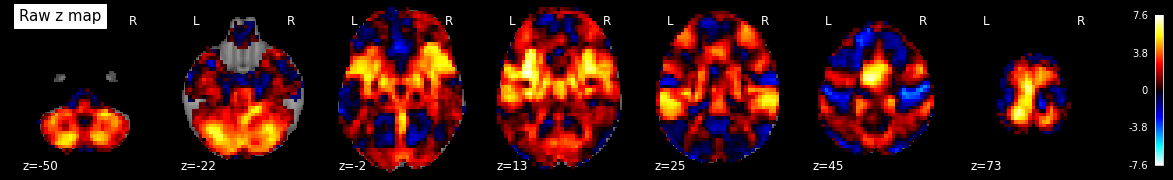

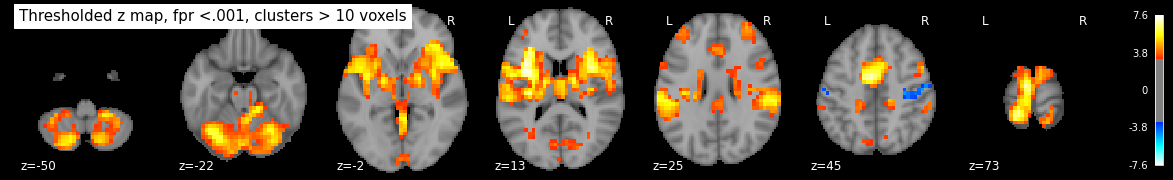

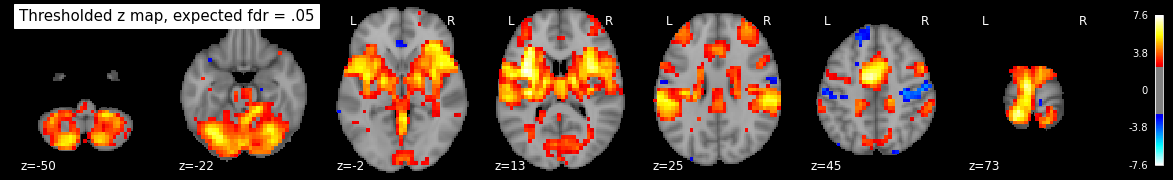

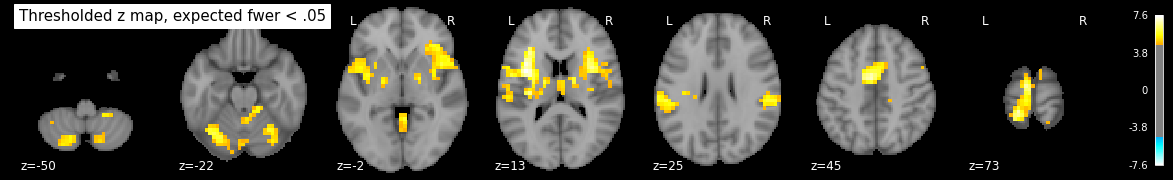

In [4]:
# Visualize

from nilearn import plotting

# unthresholded map
display = plotting.plot_stat_map(z_map, title='Raw z map', black_bg=True,  display_mode='z')

# p<.001 uncorrected thresholded map (clusters >10 voxels)
plotting.plot_stat_map(
    thresholded_map1, cut_coords=display.cut_coords, threshold=threshold1, black_bg=True,  display_mode='z',
    title='Thresholded z map, fpr <.001, clusters > 10 voxels')

# FDR-thresholded map
plotting.plot_stat_map(thresholded_map2, cut_coords=display.cut_coords, black_bg=True,  display_mode='z',
                       title='Thresholded z map, expected fdr = .05',
                       threshold=threshold2)

# Bonferroni-thresholded map
plotting.plot_stat_map(thresholded_map3, cut_coords=display.cut_coords, black_bg=True,  display_mode='z',
                       title='Thresholded z map, expected fwer < .05',
                       threshold=threshold3)

## Second Level GLM 2: Post-Pre per Group

In [9]:
from nilearn import image 

In [5]:
import bids
layout = bids.BIDSLayout('/Volumes/Seagate_Desktop_Drive/mfc/derivatives/fmriprep/',validate=False)
subjects = layout.get_subjects()

In [10]:
# Post - Pre per subject

for sub in subjects:
    print(sub)
    pre = image.mean_img(f'/Volumes/Seagate_Desktop_Drive/mfc/GLM/First_Levels/sub-{sub}*h[12]*.nii.gz')
    post = image.mean_img(f'/Volumes/Seagate_Desktop_Drive/mfc/GLM/First_Levels/sub-{sub}*h[34]*.nii.gz')
    diff = image.math_img('post - pre', post=post, pre=pre)
    diff.to_filename(f'/Volumes/Seagate_Desktop_Drive/mfc/GLM/Second_Levels/sub-{sub}_post-pre.nii.gz')

mfcc003
mfcc006
mfcc007
mfcc011
mfcc014
mfcc016
mfcc024
mfcc026
mfcc027
mfcc029
mfcc035
mfcc036
mfcc037
mfcc039
mfcc041
mfcc042
mfcc045
mfcc048
mfcc053
mfcc054
mfcm001
mfcm005
mfcm009
mfcm012
mfcm019
mfcm020
mfcm021
mfcm023
mfcm031
mfcm032
mfcm033
mfcm040
mfcm043
mfcm044
mfcm046
mfcm047
mfcm051
mfcm052
mfcm055
mfcm057


## Third Level GLM: Meditation Group, 
Post-Pre, 49>35

In [11]:
diff_maps = Path('/Volumes/Seagate_Desktop_Drive/mfc/GLM/Second_Levels/').glob('sub-mfcm*.nii.gz')   # load meditation group second level imgs
diff_maps = [str(file) for file in sorted(diff_maps)]

# define design matrix
dm3 = pd.DataFrame([1] * len(diff_maps), columns=['intercept'])

# specify & estimate model
from nilearn.glm.second_level import SecondLevelModel
third_level_model = SecondLevelModel(n_jobs=-2).fit(
    diff_maps, design_matrix=dm3)

# compute 1-sample t-test contrast
diff_map = third_level_model.compute_contrast(output_type='z_score')

# threshold map: false positive rate < 0.001, cluster size > 10 voxels
from nilearn.glm import threshold_stats_img
thresholded_map1, threshold1 = threshold_stats_img(
    diff_map, alpha=.01, height_control='fpr', cluster_threshold=10)

# FDR
thresholded_map2, threshold2 = threshold_stats_img(
    diff_map, alpha=.05, height_control='fdr')
print('The FDR=.05 treshold is %.3g' % threshold2)

# FWER
thresholded_map3, threshold3 = threshold_stats_img(
    diff_map, alpha=.05, height_control='bonferroni')
print('The p<.05 Bonferroni-corrected threshold is %.3g' % threshold3)

The FDR=.05 treshold is inf
The p<.05 Bonferroni-corrected threshold is 4.79


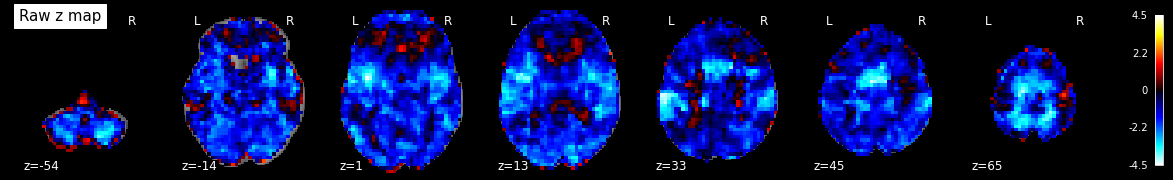

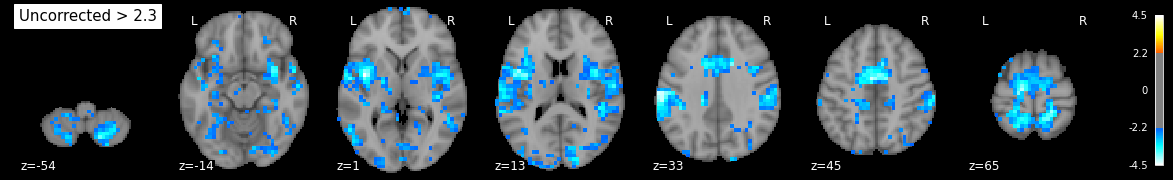

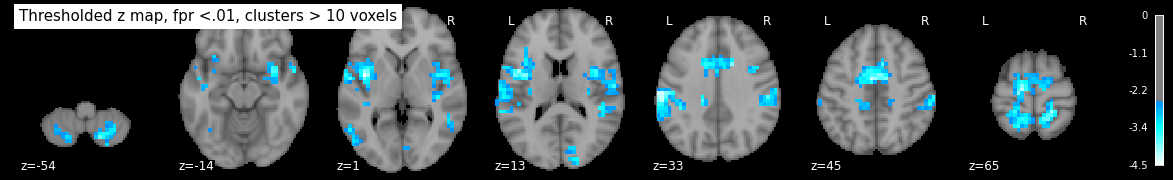

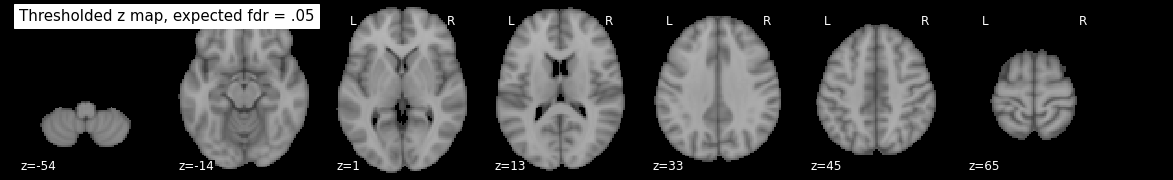

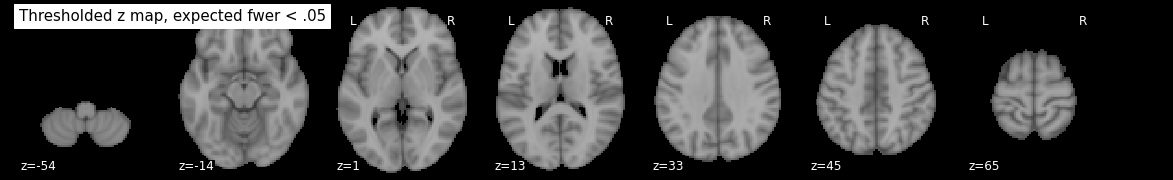

In [12]:
# Visualize

from nilearn import plotting

# unthresholded map
display = plotting.plot_stat_map(diff_map, title='Raw z map', display_mode='z', black_bg=True)

# threshold z > 2.3
plotting.plot_stat_map(diff_map, title='Uncorrected > 2.3', threshold=2.3, display_mode='z', black_bg=True)

# p<.001 uncorrected thresholded map (clusters >10 voxels)
plotting.plot_stat_map(
    thresholded_map1, cut_coords=display.cut_coords, threshold=threshold1, display_mode='z', black_bg=True,
    title='Thresholded z map, fpr <.01, clusters > 10 voxels')

# FDR-thresholded map
plotting.plot_stat_map(thresholded_map2, cut_coords=display.cut_coords, display_mode='z', black_bg=True,
                       title='Thresholded z map, expected fdr = .05',
                       threshold=threshold2)

# Bonferroni-thresholded map
plotting.plot_stat_map(thresholded_map3, cut_coords=display.cut_coords, display_mode='z', black_bg=True,
                       title='Thresholded z map, expected fwer < .05',
                       threshold=threshold3)

## Third Level GLM: Meditation Group
Post - Pre, 49>35, Pain Ratings (intensity)

In [13]:
med_int_dm = [-0.89,-1.29,-1.89,2.46,-2.09,-0.49,-1.94,-0.14,0.41,-0.59,2.76,-0.14,2.26,0.21,-0.84,0.26,-0.74,0.76,1.06,0.81] # difference in pain ratings (post - pre) demeaned
med_unp_dm = [-0.83,-1.69,-2.83,4.67,-3.33,0.57,-2.88,0.27,0.77,-0.69,2.86,0.81,0.02,2.37,-0.13,-0.58,-0.18,0.97,0.27, -0.38]

In [14]:
# define design matrix
dm4 = pd.DataFrame({'inetercept':[1] * len(diff_maps), 
                   'med_int_dm': med_int_dm})

# specify & estimate model
third_level_model = SecondLevelModel(n_jobs=-2).fit(
    diff_maps, design_matrix=dm4)

# compute 1-sample t-test contrast
diff_map_int = third_level_model.compute_contrast([0,1], output_type='z_score')

# threshold map: false positive rate < 0.001, cluster size > 10 voxels
thresholded_map1, threshold1 = threshold_stats_img(
    diff_map_int, alpha=.01, height_control='fpr', cluster_threshold=10)

# FDR
thresholded_map2, threshold2 = threshold_stats_img(
    diff_map_int, alpha=.05, height_control='fdr')
print('The FDR=.05 treshold is %.3g' % threshold2)

# FWER
thresholded_map3, threshold3 = threshold_stats_img(
    diff_map_int, alpha=.05, height_control='bonferroni')
print('The p<.05 Bonferroni-corrected threshold is %.3g' % threshold3)

The FDR=.05 treshold is inf
The p<.05 Bonferroni-corrected threshold is 4.79


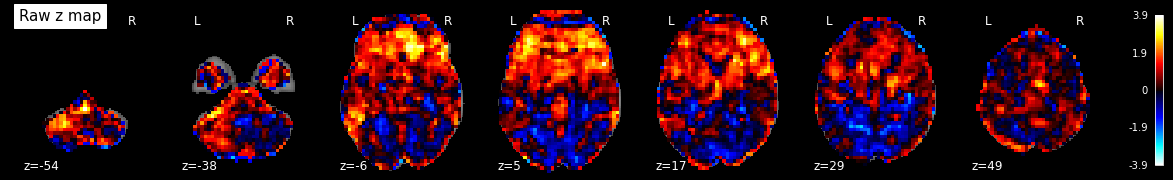

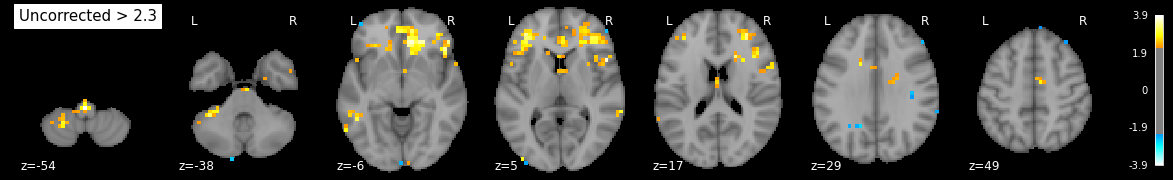

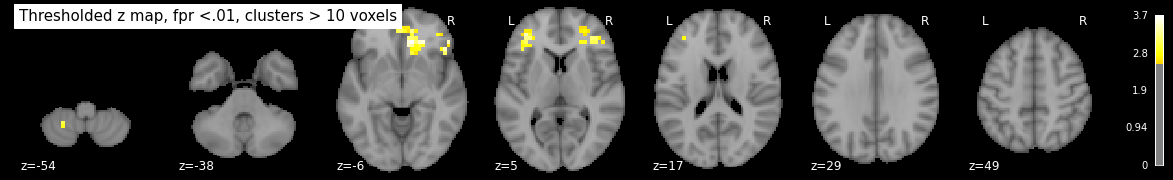

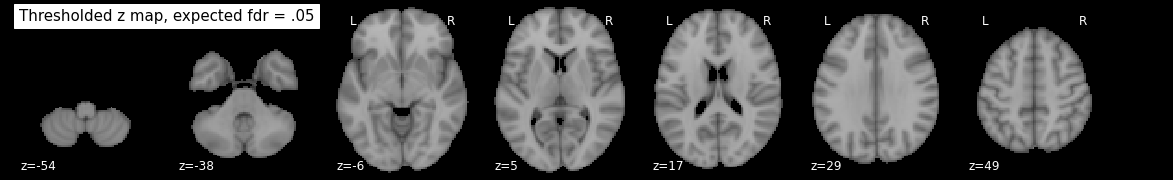

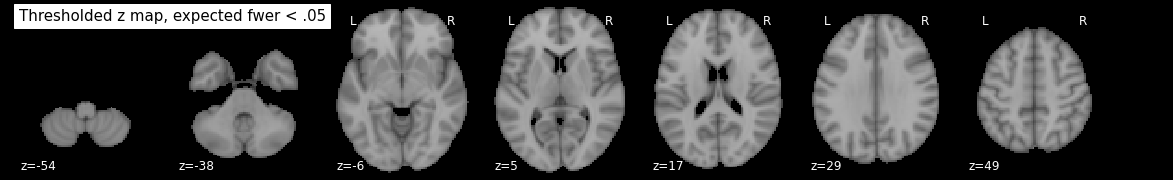

In [15]:
# Visualize

from nilearn import plotting

# unthresholded map
display = plotting.plot_stat_map(diff_map_int, title='Raw z map', display_mode='z', black_bg=True)

# threshold z > 2.3
plotting.plot_stat_map(diff_map_int, title='Uncorrected > 2.3', threshold=2.3, display_mode='z', black_bg=True)

# p<.001 uncorrected thresholded map (clusters >10 voxels)
plotting.plot_stat_map(
    thresholded_map1, cut_coords=display.cut_coords, threshold=threshold1, display_mode='z', black_bg=True,
    title='Thresholded z map, fpr <.01, clusters > 10 voxels')

# FDR-thresholded map
plotting.plot_stat_map(thresholded_map2, cut_coords=display.cut_coords, display_mode='z',
                       title='Thresholded z map, expected fdr = .05', black_bg=True,
                       threshold=threshold2)

# Bonferroni-thresholded map
plotting.plot_stat_map(thresholded_map3, cut_coords=display.cut_coords, display_mode='z',
                       title='Thresholded z map, expected fwer < .05', black_bg=True,
                       threshold=threshold3)

## Second Level GLM: All sub, 49>35, h1, Non-Parametric

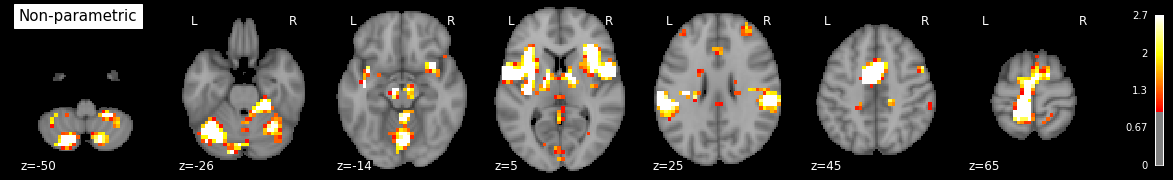

In [16]:
from nilearn.glm.second_level import non_parametric_inference

non_parametric_diff_int = non_parametric_inference(z_maps,     # neg-log p-vals image
                             design_matrix=dm2,
                             second_level_contrast=[1],
                             model_intercept=True, n_perm=500,
                             two_sided_test=False,
                             n_jobs=-2)

display = plotting.plot_stat_map(non_parametric_diff_int, title='Non-parametric', 
                                 display_mode='z', threshold = 1, black_bg=True)    # -log10(.05) = 1.3, threshold for p < 0.05


In [ ]:
import numpy as np
-np.log10(.1)